_Gede Ria Ghosalya (1001841)_

## Homework 2

** Q1. Find any separating hyperplane equation for these three sample points: **

$x^{(1)} = (−2, 2), \space y^{(1)} = −1, \quad x^{(2)} = (4, 0), \space y^{(2)} = −1, \quad and \space x^{(3)} = (−2, −3), \space y^{(3)} = +1 $. 

Draw (by hand) or plot (using Python, see matplotlib) the result.


Looking at the 3 points, it is possible to separate by the following equation 

$$ x_2 = -1 $$

with the points lying as follows,

$$ x^{(1)}_2 = 2 > -1, \quad y^{(1)} = -1 $$
$$ x^{(2)}_2 = 0 > -1, \quad y^{(2)} = -1 $$
$$ x^{(3)}_2 = -3 < -1, \quad y^{(3)} = +1 $$

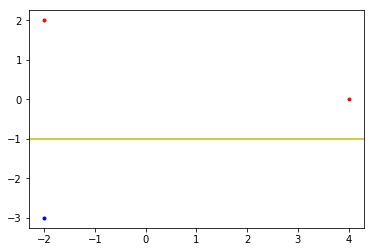

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# from mpl_toolkits.mplot3d import Axes3D

x_negative = np.asarray([[-2, 2],[4,0]])
x_positive = np.asarray([[-2, -3]])
# y = np.ndarray([-1, -1, 1])

# fig = plt.figure()
ax = plt.figure().add_subplot(111)
plt.plot(x_positive[:,0], x_positive[:,1], '.b')
plt.plot(x_negative[:,0], x_negative[:,1], '.r')

# for the hyperplane
line_points = np.asarray([[-3, -1], [5, -1]])
line = Line2D(line_points[:,0],line_points[:,1], color='y')
ax.add_line(line)

plt.show()

** Q2. Find by hand the value of optimum weights $ \hat w $ and bias  $ \hat b $ using linear regression for
the four following sample points: **

$$ x^{(1)} = (1, 0), \space y^{(1)} = +1, \quad x^{(2)} = (2, 3), \space y^{(2)} = +1, \quad x^{(3)} = (3, 4), \space y^{(3)} =
−1, \quad x^{(4)} = (3, 2), \space y^{(4)} = −1. $$

** Show your working. If you have to do matrix inversion, then you
can use a program to compute the matrix inverse.**


Converting data points to matrices (with appended 1 for X),

$$ X = \begin{bmatrix}
        1 & 0 & 1\\
        2 & 3 & 1\\
        3 & 4 & 1\\
        3 & 2 & 1\\
       \end{bmatrix}, \quad
  Y = \begin{bmatrix}
       +1 \\
       +1 \\
       -1 \\
       -1 \\
      \end{bmatrix}$$
      
Using closed form solution,

$$ \hat w = (X^T \cdot X)^{-1} \cdot X^T \cdot Y $$
$$ \hat w = \left( \begin{bmatrix}
                    1 & 2 & 3 & 3 \\
                    0 & 3 & 4 & 2 \\
                    1 & 1 & 1 & 1 \\
                  \end{bmatrix} 
            \cdot
                \begin{bmatrix}
                    1 & 0 & 1\\
                    2 & 3 & 1\\
                    3 & 4 & 1\\
                    3 & 2 & 1\\
                \end{bmatrix} \right)^{-1} 
            \cdot 
                \begin{bmatrix}
                    1 & 2 & 3 & 3 \\
                    0 & 3 & 4 & 2 \\
                    1 & 1 & 1 & 1 \\
                \end{bmatrix} 
            \cdot
                \begin{bmatrix}
                    +1 \\
                    +1 \\
                    -1 \\
                    -1 \\
                \end{bmatrix}$$

$$ \hat w = \left( \begin{bmatrix}
                    1+4+9+9 & 0+6+12+6 & 1+2+3+3 \\
                    0+6+12+6 & 0+9+16+4 & 0+3+4+2 \\
                    1+2+3+3 & 0+3+4+2 & 1+1+1+1 \\
                  \end{bmatrix}  \right)^{-1} 
            \cdot 
                \begin{bmatrix}
                    1 + 2 - 3 - 3 \\
                    0 + 3 - 4 - 2 \\
                    1 + 1 - 1 - 1 \\
                \end{bmatrix}$$
                
$$ \hat w = \left( \begin{bmatrix}
                    23 & 24 & 9 \\
                    24 & 29 & 9 \\
                    9 & 9 & 4 \\
                  \end{bmatrix}  \right)^{-1} 
            \cdot 
                \begin{bmatrix}
                    - 3 \\
                    - 3 \\
                    0 \\
                \end{bmatrix}$$
                
            
              


      


In [17]:
pre_w = np.asarray([[23,24,9],[24,29,9],[9,9,4]])
pre_w_inv = np.linalg.inv(pre_w)
print(pre_w_inv)

[[ 0.875 -0.375 -1.125]
 [-0.375  0.275  0.225]
 [-1.125  0.225  2.275]]


$$ \hat w = \begin{bmatrix}
                0.875 & -0.375 & -1.125 \\
                -0.375 & 0.275 & 0.225 \\
                -1.125 & 0.225 & 2.275 \\
            \end{bmatrix}  
            \cdot 
            \begin{bmatrix}
               - 3 \\
               - 3 \\
                 0 \\
            \end{bmatrix}$$
            
$$ \hat w = \begin{bmatrix}
                -0.875*3 + 0.375*3 + 0 \\
                0.375*3 - 0.275*3 + 0 \\
                1.125*3 - 0.225*3 + 0 \\
            \end{bmatrix}$$
            
$$ \hat w = \begin{bmatrix}
                - 2.625 + 1.125 \\
                1.125 - 0.825 \\
                3.375 - 0.675 \\
            \end{bmatrix} 
            =
            \begin{bmatrix}
                -1.5 \\
                0.3 \\
                2.7 \\
            \end{bmatrix} 
            $$

** Answer the following question: How can you
obtain a solution via the closed-form method (that is not by using gradients) which does not use
an inverse matrix $ (X^T \cdot X)^{−1} $ to obtain the weight vector $w$? **


It is possible to avoid inverting $ (X^T \cdot X) $ by using LUP decomposition (Lower, Upper, Permutation).

The LUP decomposition can solve a linear problem $ Ax = b $ by this decomposition, such that 

$$ PA = LU \quad and \quad LUx = Pb$$

hence, supposed that we can find $L$,$U$,$P$ matrix such that

$$ P(X^TX) = LU$$

$$ and \quad LUW = P(X^TY) $$

$$ where \quad (X^TX) \cdot W = X^TY \quad (for\space finding \space W)$$

we can solve for $W$ by solving

$$ h \space in \quad Lh = P(X^TY) $$

$$ then \space W \space in \quad UW = h $$

** Q3. In logistic regression, we model the probability of a label $y ∈ \{−1, 1\}$ given a sample point $x ∈ R^2$ as, **

$$ P(Y = y \mid x) = \frac{1}{1 + e^{−y(w·x+c)}} $$

** where $c$ is the bias term. Answer the following questions.**

1)  Obviously the function above alone is not linear. However, given that after we know what
the values $w$ are (after training), prove that the decision boundary obtained from logistic
regression is linear, i.e.: the decision boundary is a hyperplane with equation $w \cdot X = 0$.
Hint: Since $x$ is two-dimensional, the decision boundary is the set of $x$ such that $P(Y =
−1 \mid x) = P(Y = 1 \mid x)$.




$$ P(Y = y \mid x) = \frac{1}{1 + e^{−y(w·x+c)}} $$

For decision boundary, 

$$ P(Y = −1 \mid x) = P(Y = 1 \mid x) = 0.5 $$

$$ P(Y = -1 \mid x) = \frac{1}{1 + e^{−(-1)(w·x+c)}} $$

$$ 0.5 = \frac{1}{1 + e^{(w·x+c)}} $$

$$ 1 + e^{(w·x+c)} = 2 $$

$$ e^{(w·x+c)} = 1 = e^0$$


$$ w·x+c = 0 \quad (linear \space boundary)$$



2) Suppose we have obtained the optimum weights, $ \hat w = (w_1, w_2) $ and bias $\hat c$ in the case of
2-dimensional data points. The decision boundary is supposedly a line that separate points
with positive and negative labels, which has an equation in the form of $x_2 = mx_1 + k$.
Obtain an expression for $m$ and $k$ in terms of $w_1$, $w_2$ and $\hat c$. When this expression of the
form $x_2 = mx_1 + k$ is not defined?

$$ w·x+c = 0 \quad (linear \space boundary)$$

$$ \begin{bmatrix} w_1 & w_2 \end{bmatrix} \cdot \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + \hat c = 0 $$

$$ w_1 x_1 + w_2 x_2 + \hat c = 0 $$

$$ w_2 x_2 = - w_1 x_1 - \hat c $$

$$ x_2 = \frac{w_1}{w_2} x_1 - \frac{\hat c}{w_2} $$

$$ m = -\frac{w_1}{w_2}, \quad k = -\frac{\hat c}{w_2} $$

$x_2 = mx_1 + k$ is not defined when $w_2$ = 0.

**Q4. The following is the regularized logistic regression loss function.**

$$ L(w) = −\frac{1}{m} 
        \left[ 
            \sum_{i=1}^{m} 
                y^{(i)} log(h_w(x^{(i)}))
                + (1-y^{(i)})(1-log(h_w(x^{(i)}))
        \right]
        + \frac{\lambda}{2} ||w||^2 $$

**Compute the gradient of the loss with respect to w and write down the
gradient descent update equation. Show all steps clearly.**


For simplicity, $y^{(i)}$ will be denoted as $y$ and so is for $x$. Also, we can separate the loss function as follows.

$$ L(w) = P(w) + r(w) $$

$$ where \quad P(w) = -\frac{1}{m} \sum_{i=1}^{n}p_w(x^{(i)}, y^{(i)}) $$

For regularizer $r$,

$$ \frac{dr(w)}{dw} = \lambda w $$

For the prediction term $p_w$,

$$ p_w(x,y) = (y log(h_w(x)) + (1-y)(1-log(h_w(x))) $$

$$ where \quad h_w(x) = s(u) = \frac{1}{1+ e^{y \cdot u}}$$
$$ u =  (w \cdot x+c), \space \frac{du}{dw} = x $$

$$ and \quad \frac{d \space log(s(u))}{du} = 1 - s(u), \space \frac{d \space log(1-s(u))}{du} = -s(u), $$

$$ therefore \quad \frac{dp_w(x, y)}{du} = -\frac{1}{m} \left( y(1-s(u)) + (1-y)(-s(u)) \right) $$

$$ \frac{dp_w(x, y)}{dw} = \frac{dp_w}{du} \cdot \frac{du}{dw} = -\frac{1}{m} \left( y(1-s(u)) + (1-y)(-s(u)) \right) \cdot  ( x) $$

$$ \frac{dp_w(x, y)}{dw}  = -\frac{1}{m} \left( y- y \cdot s(u) - s(u) +y \cdot s(u) \right) \cdot  ( x) $$

$$ \frac{dp_w(x, y)}{dw}  = -\frac{1}{m} \left( y - s(u) \right) \cdot  ( x) $$

$$ \frac{dp_w(x, y)}{dw}  = -\frac{1}{m} \left (x) ( y - h_w(x) \right) $$

therefore,

$$ \frac{dL(w)}{dw} = \frac{dP(w)}{dw} + \frac{dr(w)}{dw} $$

$$ \frac{dL(w)}{dw} = -\frac{1}{m} \sum_{i=1}^{n} \frac{dp_w(x^{(i)},y^{(i)})}{dw} + \frac{dr(w)}{dw} $$

$$ \frac{dL}{dw} = -\frac{1}{m} \left(\sum_{i=1}^{m} x^{(i)} ( y^{(i)} - h_w(x^{(i)})) \right) + \lambda w $$

$$ w_{k+1} = w_{k} + \eta \left( \frac{1}{m} \sum_{i=1}^{m} (x^{(i)} ( y^{(i)} - h_{w_k}(x^{(i)})) + \lambda w_k \right)$$

